# Data Exploration Notebook
   In this Notebbok we will see all the concepts related to Data Exploration and Data Cleaning which account to the 70% of the  time you spent in Machine learning problems. 
# Problem Statement:
   The problem we are considering is a Loan prediction problem where a bank wants to automate its loan eligibility process so as to save time and cost. We are provided with a training set with some predictor variables which we will se in the notebook and the target variable(y) on which we will explore and try to find some meaningful insights and build our model. Then we have a Testing set on which we have to predict whether the customer is eligible for loan or not. This is a Binary classification problem as it has two classes, is not eligible(0) or is eligible(1) for loan. We want to classify customers according to these two classes.

In [2]:
#importing all the necessary libraries required for the model
import numpy as np #for linear algebra
import pandas as pd #data processing, reading files etc
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline 
plt.style.use("ggplot")  #uses the style of ggplot2 which is a R library, but is now available in python as ggplot


#importing the files

train = pd.read_csv("C:/Users/fr5424/Data/AnalyticsVidya/Loan_prediction_problem/train.csv", index_col = 0)
test = pd.read_csv("C:/Users/fr5424/Data/AnalyticsVidya/Loan_prediction_problem/test.csv", index_col = 0)

Lets begin with the Data Exploration part of this datset

In [3]:
#to check what all are the columns in the dataset
train.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y


In [4]:
test.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban


In [5]:
#checking what is the size of the training dataset and the testing dataset
print(train.shape)
print(test.shape)

(614, 12)
(367, 11)


As you notice that there are 13 rows in the training dataset and in the test there are only 12, which tell us that 1 variable is the target variable in this case its "Loan_Status" - Having values Y for yes and N for No, which we have to predict in the Testing dataset - test.csv

# Step 1: Variable Identification
Read the description about all your Predictor variables and your target variables. Information about these can be found here:https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

Identify the datatypes of all the predictor variables and the target variable.

In [6]:
#to check the datatypes of all the variables
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


From this we come to know what are the datatypes in our data and also the missing values that we have in our data, we will deal with missing values in the later part, first lets move on to analyze these varibles individually

# Step2: Univariate Analysis
In this step we try and analyze every variable individually to see its distribution etc. As this is a small dataset we can analyze every variable if possible but for large datsets we need to find groups and see which variables fall in the same group so that a complete group can be analyzed in the same manner. This saves us a lot of time

We analyze continous and categorical variables differently.

# Continous variables
For continous variables we need to find the central tendency and spread of these continous variable to check what is the skew, or are they normally distributed. They are measured using statistical metrics

Central Tendency : Mean, Median, Mode, Min, Max

Visualization methods : Histogram, Boxplots


In [7]:
#Lets look at the summary of our continous variables
train.describe()

C:\Users\fr5424\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Its because there are some missing values in the last three columns we are not getting the percentiles, its fine we will deal with it in the later section. But we surely got what is the summary of the other two variables"ApplicantIncome and CoapplicantIncome".

In [8]:
#lets check the distribution of our continous variables, as the variable "CoapplicantIncome" is very uncertain,because many rows 
#would have this as 0 which is natural, therefore its distribution will be a bit different, so lets ignore it.

plt.rcParams["figure.figsize"] = (12, 6) #setting the size of graphs to be generated
first = pd.DataFrame({"ApplicantIncome" : train.ApplicantIncome, "Log_ApllicantIncome" : np.log1p(train.ApplicantIncome)})



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000941F630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000097B37B8>]], dtype=object)

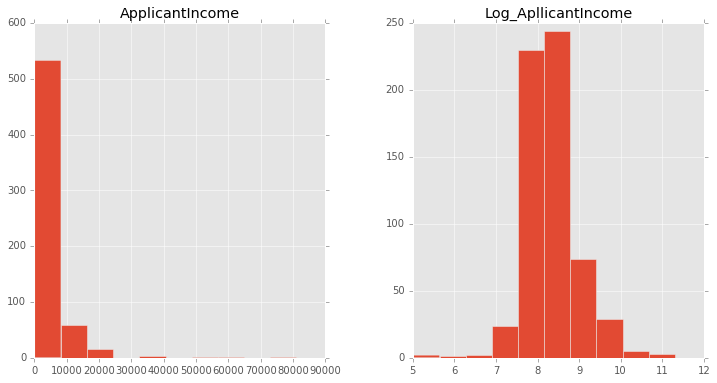

In [9]:
#plotting

first.hist()


We can see that the ApplicantIncome was not properly distributed(positive skew) but after taking the Log for all the values it seems to be normally distributed now.

We should always understand what values a variable brings to the dataset, we can say that people who are not that educated can have lower incomes so lets plot that using a Box Plot, we can also visualize the effect of Gender on our Applicant income.

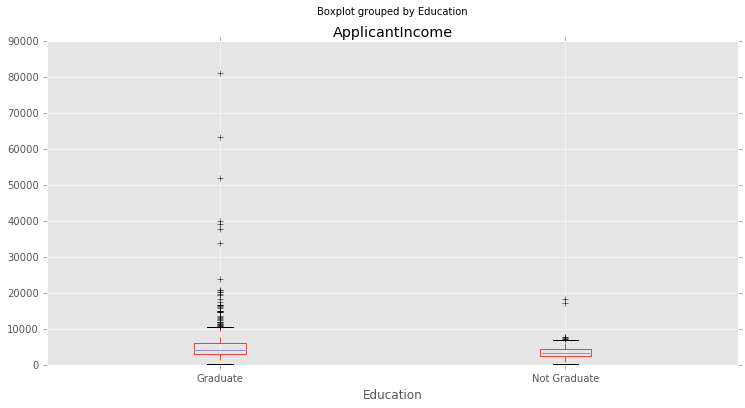

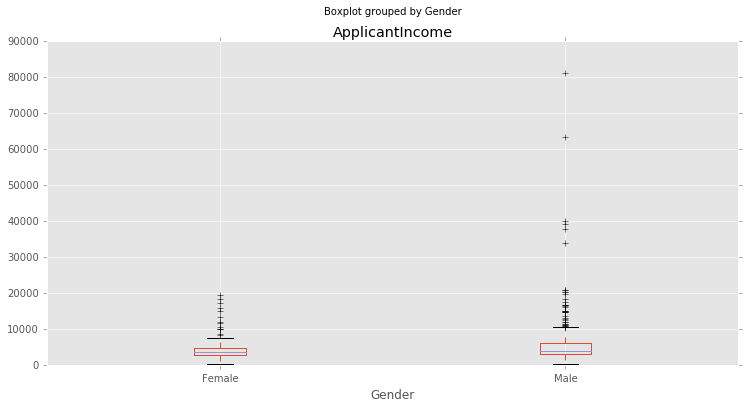

In [10]:
train.boxplot(column = "ApplicantIncome", by = "Education")
train.boxplot(column = "ApplicantIncome", by = "Gender")

From these two BoxPlots we can certainly say that people with who are graduates have more number of people earning greater than the mean level and also for Gender we can say that the nummber of males is greater who earn more than the mean level. These inferences can be drawn looking at the outliers in the boxplots.

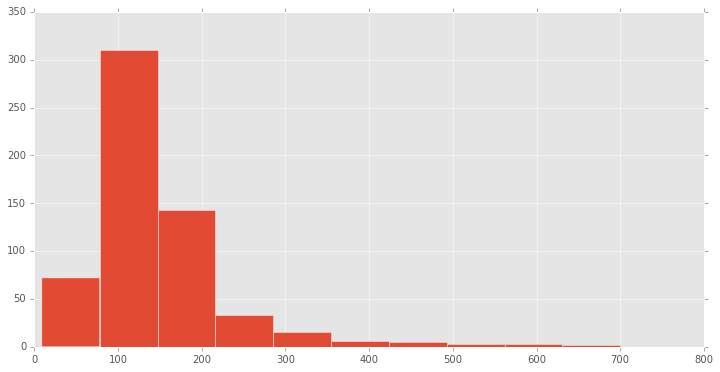

In [11]:
#We can do this for Loan Amount as well

train["LoanAmount"].hist()

LoanAmount is also not properly distributed, but we will deal with this later as it has missing values

Lets check for the boxplot of Loan amount

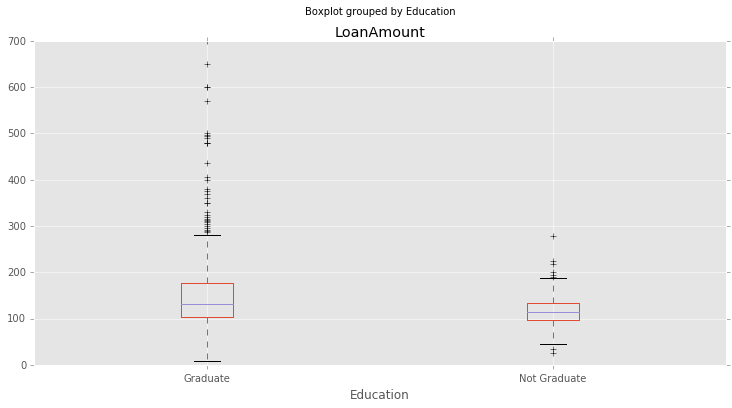

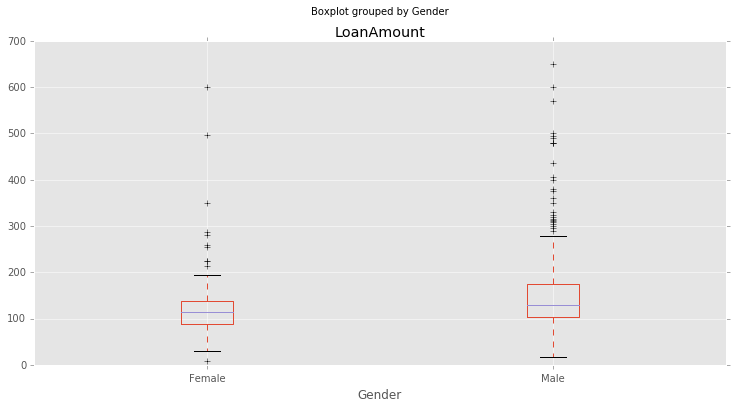

In [12]:
train.boxplot(column = "LoanAmount", by = "Education")
train.boxplot(column = "LoanAmount", by = "Gender")

This is very similar to the inferences we had drawn from the Applicant Income. Lets move onto Categorical Analysis

# Categorical Variables
For Categorical variable analysis we can use Frequency tables to understand them quickly,
Frequency table can be created using the value_counts() method

We can also try and use Pivot tables similar to Excel to get some information from our variables

Visualization methods = BarCharts, StackedCharts

In [13]:
temp1 = train['Credit_History'].value_counts(ascending=True)
temp2 = train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:') 
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


Lets see this using a Stacked Chart, tey can be created in the barchart itself but we have to use a pandas function called "crosstab" to tell which variables you want to include

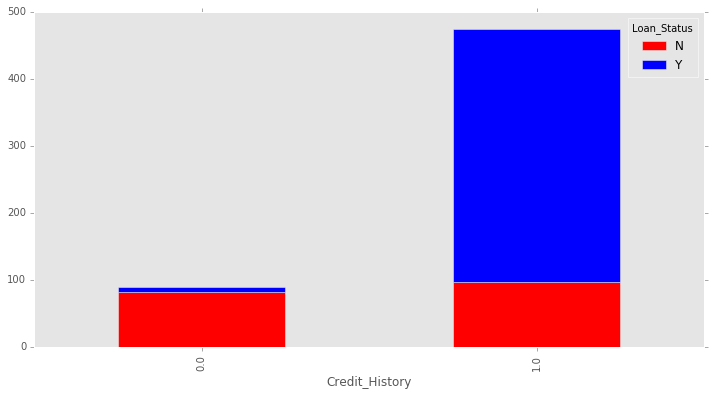

In [14]:
temp3 = pd.crosstab(train['Credit_History'], train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

This gives us a clear representation for Loan_status telling us that if your credit history is 0, you have very less chances of gettiing a loan compared to a credit history with 1

As we are donw with Univariate Analysis, we will further move on to the Bivariate analysis

# Step 3: Bivariate Analysis
Here we look for the relation between two variables, we look for association and disassociation between variables. We perform this analysis on any combination of continous and categorical variables

# Continous and Continous variables
For doing Bivariate analysis of two continous variables, we can use scatter plots or can also use the Pearson correlation to know the correlation value. The pattern of scatter plots can also tell us how are the variables related to each other in a linear manner or in a non-linear way



In [16]:
#using the Pearson correlation we can have the values to know how much are these variables related, for this we need to set a 
#threshold


threshold = 0.5

size = 5 #size of the numerical values in the dataset

cols= train.columns #getting the names of all the columns in the datset 

num_values = train.iloc[:, 5:10] #taking in the numerical values from the dataset

corr_list = []

#finding corelation for the numerical values
num_values_corr = num_values.corr()

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (num_values_corr.iloc[i,j] >= threshold and num_values_corr.iloc[i,j] < 1) or (num_values_corr.iloc[i,j] < 0 and num_values_corr.iloc[i,j] <= -threshold):
            corr_list.append([num_values_corr.iloc[i,j],i,j])
            
#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

Gender and Dependents = 0.57


As we see from the Pearson Correlation we only have one set of continous variables which have a correlation value above 0.5

Lets try to implement this visually, You can use either a HEAT MAP from seaborn or you can use the scatter matrix from pandas

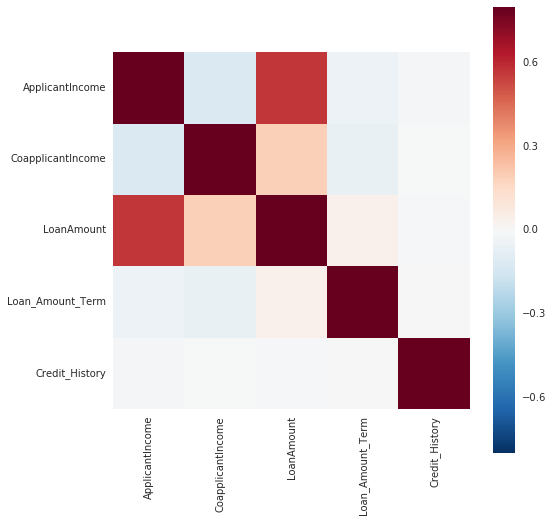

In [17]:
import seaborn as sns
cols_to_use = ["ApplicantIncome", 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

temp_df = train[cols_to_use]
corrmat = temp_df.corr()
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C573E48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C9F0C88>]], dtype=object)

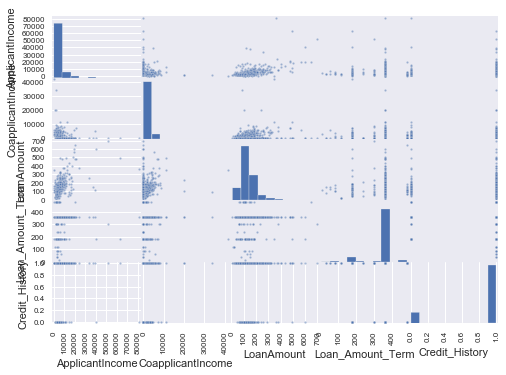

In [18]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(train)

We can see from the above two graphs that none of the two variables in the dataset are correlated to each other. There is no correlation at all

# Categorical and Continous variable
For finding some interesting associations between categorical variables we can use Two way table or the Stacked Column chart which is what we did in the Univariate analysis with- ApplicationIncome and Gender

We can also perform the chi-square test to check the relation between the two categorical variables. it is given by the formula

  X**2 = SUM (Observed - Expected)**2/ Expected

In [19]:
#lets do the Chi-square test

from scipy.stats import chi2_contingency


first = pd.crosstab(train.Property_Area, train.Dependents)
chi = chi2_contingency(first)
print(chi)

(7.073556821727129, 0.31409827839082988, 6, array([[ 101.94490818,   30.14023372,   29.84474124,   15.07011686],
       [ 130.74290484,   38.65442404,   38.2754591 ,   19.32721202],
       [ 112.31218698,   33.20534224,   32.87979967,   16.60267112]]))


An observation is only called statistically significant when the p-value is less than 0.05, as the value in this case(0.3140) is greater than that we can easily say that these values are not statistically significant

We will try these for some variables which we think can have some relationship

In [20]:
second = pd.crosstab(train.Married, train.Dependents)
chi = chi2_contingency(second)
print(chi)

(81.937623101065711, 1.1785811086969576e-17, 3, array([[ 120.37562604,   35.58931553,   35.24040067,   17.79465776],
       [ 224.62437396,   66.41068447,   65.75959933,   33.20534224]]))


The p-value test here shows us that these variables are statistically significant and somewhat associated to each other. This can be helpful for us in Feature Engineering

# Categorical and Continous Variables
For categorical and continuous variables, we can draw box plots for each level of categorical variables. If levels are small in number, it will not show the statistical significance. To look at the statistical significance we can perform Z-test, T-test or ANOVA. 

## Z-test / T-test
 Either of these tests assess whether mean of two groups are statistically different from each other or not.
 You can chose any of the test, but T-test is mostly used when the number of observations for both the categories is less than 30
 
## Anova 
 It assess whether the average of more than two groups is statistically different. It helps you compare many variables at the same time which is not possible in T-test.

Using the word correlation for this type of analysis is wrong as Correlation is defined by mean and categorical variables dont have mean, so we can call it as Association. 

# Step3: Missing Value treatment
This is a part of the Data Cleaning process, where we have many values in our dataset which are missing. The datset can have missing value for reasons like some error while Data extraction or while Data collection etc.

If we dont treat these missing values it can result in decreasing the model power to a great extent or can result in biased models as we have not analysed the behaviour and relationship of other variables correctly.


From here on , we will be dealing with both the datasets training and testing. 

We will some methods to treat these missing values in the dataset

## Deletion
We can certainly delete the rows which have missing values in them, this is feasible if the percentage of missing values is less and you have a huge amount of data. Though we should avoid this but sometimes it can be used.
Deletion can result in loss of some valuable data in other variables which could have been useful for the model. 

This method is usually not preferred.

## Mean, Mode, Median Imputation
Imputation method is the process of imputing values with some estimated ones.It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable. 

This is the most frequently used method which we should prefer as its time saving and also can be done quickly.

## Prediction Model
We can treat the missing data separately as a target variable and create a separate prediction model to predict these missing values. This is however a very tedious task and also the predicted values are well behaved than the normal valus in the variable. Can be done but is not preferred

## Using KNN imputation
In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing(KNN algorithm). its good but is very time consuming for large datasets

In [21]:
#to check the number of missing values in the dataset
print(train.isnull().sum())
print("******************")
print(test.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
******************
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [22]:
#now lets first deal with the continous variables in the dataset

#LoanAmount has some missing values, lets impute the mean of that particular variable into the missing values and for 
#Loan_Amount_term we will imputer the mode(most frequent value in the particular datas
train.LoanAmount.fillna(train.LoanAmount.mean(), inplace = True)
test.LoanAmount.fillna(test.LoanAmount.mean(), inplace = True)

In [23]:
train.Loan_Amount_Term.fillna("360", inplace = True)
test.Loan_Amount_Term.fillna("360", inplace = True)

In [24]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360,1.0,Urban


In [25]:
#For credit history, as we had seen that the the value of credit history has a great impact on Loan_status, we will replace the
#missing values with the most used value in the variable

train.Credit_History.fillna("1", inplace = True)
test.Credit_History.fillna("1", inplace = True)

You can also do some conditional imputations, if you find some interesting relations or associations in the data, SQL can be used for it as its very easy and can help you solve these conditional problems with a single query

In [26]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360,1,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360,1,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360,1,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360,1,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360,1,Urban


In [27]:
#Doing this for all the missing variables

train.Gender.fillna("Male", inplace = True)
train.Married.fillna("Yes", inplace = True)
train.Dependents.fillna("0", inplace = True)
train.Self_Employed.fillna("No", inplace = True)

test.Gender.fillna("Male", inplace = True)
test.Married.fillna("Yes", inplace = True)
test.Dependents.fillna("0", inplace = True)
test.Self_Employed.fillna("No", inplace = True)

In [28]:
#checking for the missing values in the entire dataset
print(train.isnull().sum())
print(test.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


As we now dont have any Missing Values in the Dataset, we can safely move onto the next step which is Outlier Detection

# Step 4: Outlier Detection
Outliers is an observation in the dataset, that appears far away and diverges from an overall pattern in a sample. They are well above or below the average very far from the normal values

The best way to detect outliers is using: Boxplots, Histograms and Scatter plots. 

We have already seen these type of plots in the notebook which had indicated us the existence of outliers in our data. Lets look at some of the techniques which we can use to remove outliers

## Delete Observation
Just like missing values, here also we can delete the observations which have outliers in them. This can be useful if the outlier is really a very uncertain value in the dataset, but if this value is natural, this can affect the power of our model. Deleting outliers can be used but is not the preferred method. It depends on the data that we are operating on.

# Transforming & Binning Values
This is a very common method we use, where we take the log of the variable because it reduces thte variance in the variable to a great extent, this is what we had dont in the ApplicationIncome variable right at the start of the notebook. You saw how it changed a positively skewed graph to a normal distribution

## Binning Values
Binning values is categorising the values in groups which helps us to deal with outliers

Eg: If we are measuring the weights of 5 year old kids the normal expected values are between 15 - 25 Kg but we have some values which are above that like 28, 32, 36 etc. So what we can do is group these weights as 15 - 18: Group1, 19 - 22: Group 2, 23 and above:Group 3. In this way we have given those outliers a new group and now they wont affect out data.

This can be done using the pd.cut() method in pandas

# Treat Separately(if Natural)
If you observe that the values which are outliers are really natural and can exist in the data we can build models separately for those outliers if their percentage is great. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DDEBBA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DCDF358>]], dtype=object)

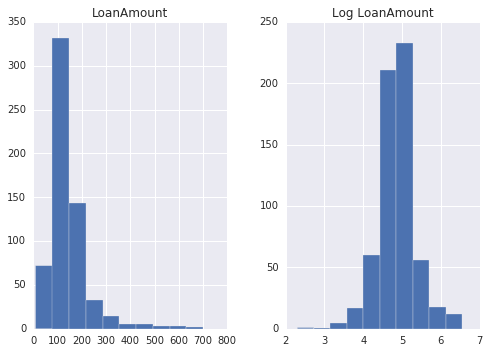

In [29]:
#As we have already dealt with the ApplicantIncome variable in the first section next we will see how does the Loan amount distribution looks like 
#and what happens if we take a log for it

first = pd.DataFrame({"LoanAmount": train.LoanAmount, "Log LoanAmount" : np.log1p(train.LoanAmount)})
first.hist()

We can observe that how the positively skewed data has now changed to a normal distribution because of taking log on that variable. Lets take log for both these variables in the dataset



# Feature Engineering
In this step we create new variables in our dataset by observing or finding some patterns which can help us create some new variables from the older ones. This can surely help us to increase the power of the model and help it to understand and fit the data in a better manner.

Feature engineering completely depends on your understanding of the data and the ability to find new patterns and trends in the data. It also depends on your domian knowledge

In [30]:
#As the loan_status is greatly affected by the income we can form a new variable called as TOTAL_INCOME because if the income 
#from the co-applicant is also contributing there are high chances of the person getting a laon. Lets add those two variables to 
#form a new variable

train["Total_Income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]
test["Total_Income"] = test["ApplicantIncome"] + test["CoapplicantIncome"]


Lets normalize this data and also the Applicant and Coapplicant income data in the dataset and then plot it

In [31]:
#lets take the logarithmic values for all these variables in the dataset

train["ApplicantIncome"] = np.log1p(train.ApplicantIncome)
test["ApplicantIncome"] = np.log1p(test.ApplicantIncome)
train["LoanAmount"] = np.log1p(train.LoanAmount)
test["LoanAmount"] = np.log1p(test.LoanAmount)
train["Total_Income"] = np.log1p(train.Total_Income)
test["Total_Income"] = np.log1p(test.Total_Income)

In [32]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,8.674197,0.0,4.993232,360,1,Urban,Y,8.674197
LP001003,Male,Yes,1,Graduate,No,8.430327,1508.0,4.859812,360,1,Rural,N,8.714732
LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.0,4.204693,360,1,Urban,Y,8.006701
LP001006,Male,Yes,0,Not Graduate,No,7.857094,2358.0,4.795791,360,1,Urban,Y,8.505525
LP001008,Male,No,0,Graduate,No,8.699681,0.0,4.955827,360,1,Urban,Y,8.699681


In [33]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
Loan_ID,,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,8.651899,0,4.709530,360,1,Urban,8.651899
LP001022,Male,Yes,1,Graduate,No,8.031710,1500,4.844187,360,1,Urban,8.428799
LP001031,Male,Yes,2,Graduate,No,8.517393,1800,5.342334,360,1,Urban,8.824825
LP001035,Male,Yes,2,Graduate,No,7.758333,2546,4.615121,360,1,Urban,8.494334
LP001051,Male,No,0,Not Graduate,No,8.094684,0,4.369448,360,1,Urban,8.094684


We will try to create one more variable, which would be LoanAmount/TotalIncome this would give us an idea whether the individual applying for loan is able to repay his loan or not

In [34]:
#creating the new variable - Repay

train["Repay"] = train["LoanAmount"] / train["Total_Income"]
test["Repay"] = test["LoanAmount"] / test["Total_Income"]

We have seen all the basic steps that you need to perform before heading to the "Building the model" phase. We should always follow these steps for any kind of problem in Machine Learning before heading towards the model building phase because, if your Data is clean and we have given the model something more than the normal data with human intutions, we can surely say the model we built will be a good model.

Here we end the Data Exploration and Data Cleaning part, next we will see how to deal with the Machine Learning part by implementing simple algorithms on our cleaned data.

*******************************************************************************************************************************
# Model Building Phase
In this phase we will start building our Prediction model

As most of the algorithms require the input data to be in numbers we need to encode our categorical variables into integers for these algorithms

This can be done using two types of encoding LabelEncoder and OneHotEncoding, we can also use pd.factorize which is similar to LabelEncoder. But the usage of these techniques totally depend on the type of the categorical variable. We shoudl always use LabelEncoder whenever the variable is a Binary variable and if the variable contains more than two classes we have to use OneHotEncoding.




In [36]:
#using LabelEncoding for some of the variables in our data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
cols = ["Gender", "Married","Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"]


for i in cols:
  train[i] = LE.fit_transform(train[i])



In [37]:
cols = ["Gender", "Married","Dependents", "Education", "Self_Employed", "Property_Area"]
for i in cols:
    test[i] = LE.fit_transform(test[i])

In [38]:
print(train.shape)
print(test.shape)

(614, 14)
(367, 13)


In [39]:
train.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Repay
Loan_ID,,,,,,,,,,,,,,
LP001002,1,0,0,0,0,8.674197,0.0,4.993232,360,1,2,1,8.674197,0.575642
LP001003,1,1,1,0,0,8.430327,1508.0,4.859812,360,1,0,0,8.714732,0.557655
LP001005,1,1,0,0,1,8.006701,0.0,4.204693,360,1,2,1,8.006701,0.525147
LP001006,1,1,0,1,0,7.857094,2358.0,4.795791,360,1,2,1,8.505525,0.563844
LP001008,1,0,0,0,0,8.699681,0.0,4.955827,360,1,2,1,8.699681,0.569656
LP001011,1,1,2,0,1,8.597482,4196.0,5.590987,360,1,2,1,9.170976,0.609639
LP001013,1,1,0,1,0,7.755339,1516.0,4.564348,360,1,2,1,8.255828,0.552864
LP001014,1,1,3,0,0,8.018625,2504.0,5.068904,360,0,1,0,8.619930,0.588045
LP001018,1,1,2,0,0,8.295798,1526.0,5.129899,360,1,2,1,8.618485,0.595220


In [45]:
train[['Loan_Amount_Term','Credit_History']] = train[['Loan_Amount_Term','Credit_History']].apply(pd.to_numeric)
test[['Loan_Amount_Term','Credit_History']] = test[['Loan_Amount_Term','Credit_History']].apply(pd.to_numeric)

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 14 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null float64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
Total_Income         614 non-null float64
Repay                614 non-null float64
dtypes: float64(7), int64(7)
memory usage: 72.0+ KB


As all the columns in our dataset have now been converted to numeric values we will go ahead and build some models on it and also check the accuracy of our models.

In [50]:
#Before we start building model first lets separate our target variable from the training dataset

y = train.Loan_Status
train = train.drop(["Loan_Status"], axis = 1)

# Logistic Regression
It is one of the first classification algorithms you learn and also one of the best.

In [57]:
model = LogisticRegression()
first = model.fit(train, y)
pred = model.predict(train)
pred1 = model.predict(test)

#Print accuracy
accuracy = metrics.accuracy_score(pred,y)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 81.107%


As we can see that the accuracy score is 81% which is fine, but can be improved with some sophisticated models


You should always use Cross-Validation techniques to improve your model, for classification problems the best CV technique is Stratified sampling method, because it takes data for the folds randomly. You can implement this for better accuracy and understanding of your model on unseen data.

# RandomForest Classifier
It is an ensemble method which is one of the best and is used widely for any kind of problem be it classification or regression. There are many advantages of using RandomForest as it reduces the variance to a great extent and also has some important methods which we can use like feature importance which we will see in the coming section

lets implement Random Forest on our data

In [60]:
model = RandomForestClassifier(n_estimators = 50)
first = model.fit(train,y)
pred = model.predict(train)
pred1 = model.predict(test)

#Print accuracy
accuracy = metrics.accuracy_score(pred,y)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 100.000%


Though we get such a high accuracy score, we can surely say that this is because of overfitting because these kind of algorithms tend to overfit the data a lot, there are various methods by which you can stop this like Pruning and also using cross validation, which you can learn from various sources like Kaggle and different blogs.

Next we will see how to find the important features from our dataset using RandomForest which contribute to our target variable the most. 

In [62]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_).sort_values(ascending=False)
print (featimp)

9     0.254755
12    0.132119
11    0.131380
5     0.128478
7     0.108904
6     0.080461
10    0.036530
8     0.031547
2     0.031430
3     0.018228
1     0.017861
0     0.014852
4     0.013456
dtype: float64
